In [1]:
from tensorly.decomposition import parafac,non_negative_parafac,candecomp_parafac
from tensorly.decomposition.candecomp_parafac import non_negative_parafac_custom
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

df_test = pd.read_csv('./Testing Data/K036VRÁS-RS211.csv',index_col=0)
df_test.index = pd.DatetimeIndex(df_test.CTime)
df_test = df_test.loc[df_test.OkPct >= 98]
df_test = df_test.loc[df_test.Flag == 524480]


In [2]:
x = df_test.loc[(df_test.CType == 4) & (df_test.Val > 0),:].Val
x = x.resample('1h').mean()
x = x.fillna(method='ffill')
weekhour_index = x.index.weekday * 24 + x.index.hour
first_0 = np.argwhere(weekhour_index == 0)[0,0]
last_0 = np.argwhere(weekhour_index == 0)[-1,0]
x = x.iloc[first_0:last_0]
X = x.values.reshape((-1,7,24))
X_time = np.array(x.index).reshape(-1,7,24)
week_time = X_time.min(axis=(2,1))
X_skerja = X.copy()

# Original parafac

In [3]:
(core_tesnor,loadings) = non_negative_parafac(X,
                                              rank=3,
                                              n_iter_max = 10000,
                                              tol=1e-14)
l_weeks,l_days,l_hours = loadings

<ipython-input-4-4553eba2421c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)


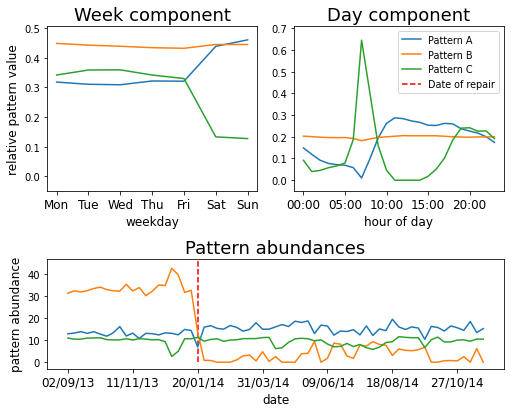

In [4]:
weekday_array = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hour_array = ['0'+str(i)+':00' for i in range(10)] + [str(i)+':00' for i in range(10,24)]

to_clean_string = lambda tmp:pd.to_datetime(str(tmp)).strftime('%d/%m/%y')

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2, 2, height_ratios=[3,2]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1]),plt.subplot(gs[2:])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]



ax[0].plot(weekday_array,l_days)
ax[1].plot(hour_array,l_hours)
ax[2].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_days)
y_max_2 = np.max(l_hours)
y_max_3 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-0.05,y_max_2*y_lim_scaling_factor)
ax[2].set_ylim(-3,y_max_3*y_lim_scaling_factor)

# Leak mark
ax[2].vlines(week_time[435:500][20],0,y_max_3*y_lim_scaling_factor,color='red',linestyle='--')

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Day component',fontsize=sub_title_font_size)
ax[2].set_title('Pattern abundances',fontsize=sub_title_font_size)

ax[1].vlines(0,0,0.0,color='red',linestyle='--')
ax[1].legend(['Pattern A','Pattern B','Pattern C','Date of repair'],fontsize= small_font_size*0.8)

ax[1].set_xticks(np.arange(0,24,5))
ax[2].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)
ax[1].set_xticklabels(hour_array[::5],fontsize=small_font_size)
ax[2].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)

ax[0].set_xlabel('weekday',fontsize=small_font_size)
ax[1].set_xlabel('hour of day',fontsize=small_font_size)
ax[2].set_xlabel('date',fontsize=small_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
# ax[1].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[2].set_ylabel('pattern abundance',fontsize=small_font_size)

# fig.suptitle('non-negative PARAFAC\nresidential neighbourhood',fontsize=title_font_Size)
plt.tight_layout()
plt.show()

# "ORIGINAL NMF"

In [5]:
(core_tesnor,loadings) = non_negative_parafac(X.reshape(-1,7*24),
                                              rank=3,
                                              n_iter_max = 10000,
                                              tol=1e-14)
l_weeks,l_week = loadings

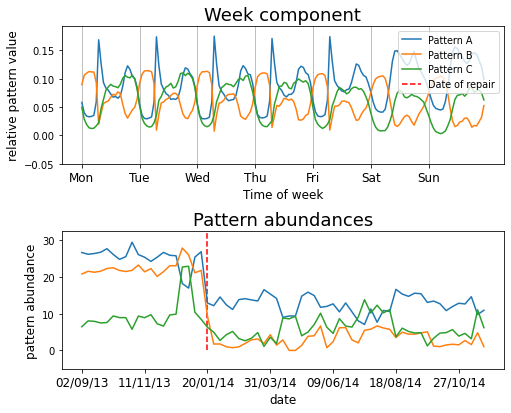

In [6]:


weekhour_array = np.full(168,'',dtype='<U3')
weekhour_array[np.arange(0,168,24)] = weekday_array
weekhour_array

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2,1, height_ratios=[1,1]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]

ax[0].plot(l_week)
ax[1].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_week)
y_max_2 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-5,y_max_2*y_lim_scaling_factor)

ax[0].set_xticks(np.arange(0,168,24))
ax[1].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekhour_array[::24],fontsize=small_font_size)
ax[1].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)


ax[0].set_xlabel('Time of week',fontsize=small_font_size)
ax[1].set_xlabel('date',fontsize=small_font_size)

ax[0].vlines(0,0,0.0,color='red',linestyle='--')
ax[0].legend(['Pattern A','Pattern B','Pattern C','Date of repair'],fontsize= small_font_size*0.8,loc='upper right')

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Pattern abundances',fontsize=sub_title_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[1].set_ylabel('pattern abundance',fontsize=small_font_size)

# Leak mark
ax[1].vlines(week_time[abundance_start:abundance_end][20],0,35,color='red',linestyle='--')
ax[0].grid(axis='x')
plt.tight_layout()
plt.show()

# Custom PARAFAC

In [7]:
flat_factors = [(1,2),(2,2)]

(core_tesnor,loadings) = non_negative_parafac_custom(X,
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-10,  
                                                     flat_factors = flat_factors)
l_weeks,l_days,l_hours = loadings



<ipython-input-8-80d2d5da1f4e>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)


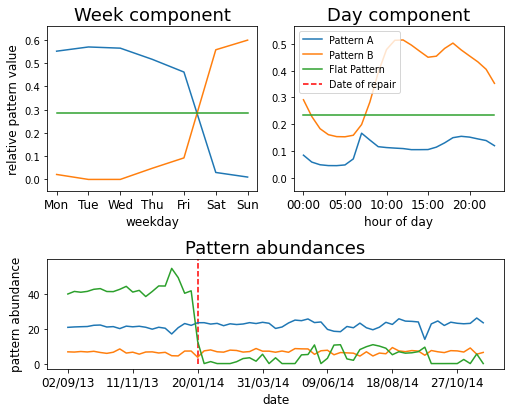

In [8]:

weekday_array = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hour_array = ['0'+str(i)+':00' for i in range(10)] + [str(i)+':00' for i in range(10,24)]

to_clean_string = lambda tmp:pd.to_datetime(str(tmp)).strftime('%d/%m/%y')

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2, 2, height_ratios=[3,2]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1]),plt.subplot(gs[2:])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]



ax[0].plot(weekday_array,l_days)
ax[1].plot(hour_array,l_hours)
ax[2].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_days)
y_max_2 = np.max(l_hours)
y_max_3 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-0.05,y_max_2*y_lim_scaling_factor)
ax[2].set_ylim(-3,y_max_3*y_lim_scaling_factor)
# Leak mark
ax[2].vlines(week_time[435:500][20],0,y_max_3*y_lim_scaling_factor,color='red',linestyle='--')

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Day component',fontsize=sub_title_font_size)
ax[2].set_title('Pattern abundances',fontsize=sub_title_font_size)


ax[1].vlines(0,0,0.0,color='red',linestyle='--')
ax[1].legend(['Pattern A','Pattern B','Flat Pattern','Date of repair'],fontsize= small_font_size*0.8)
             
# ax[0].legend(['Pattern A','Pattern B','Pattern C',],fontsize= small_font_size)
# ax[1].legend(['Pattern A','Pattern B','Pattern C'],fontsize= small_font_size)

ax[1].set_xticks(np.arange(0,24,5))
ax[2].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)
ax[1].set_xticklabels(hour_array[::5],fontsize=small_font_size)
ax[2].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)

ax[0].set_xlabel('weekday',fontsize=small_font_size)
ax[1].set_xlabel('hour of day',fontsize=small_font_size)
ax[2].set_xlabel('date',fontsize=small_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
# ax[1].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[2].set_ylabel('pattern abundance',fontsize=small_font_size)

# fig.suptitle('non-negative PARAFAC\nresidential neighbourhood',fontsize=title_font_Size)
plt.tight_layout()
plt.show()

# Custom "NMF"

In [9]:
flat_factors = [(1,2)]
(core_tesnor,loadings) = non_negative_parafac_custom(X.reshape(-1,7*24),
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-14,
                                                     flat_factors = flat_factors)
l_weeks,l_week = loadings

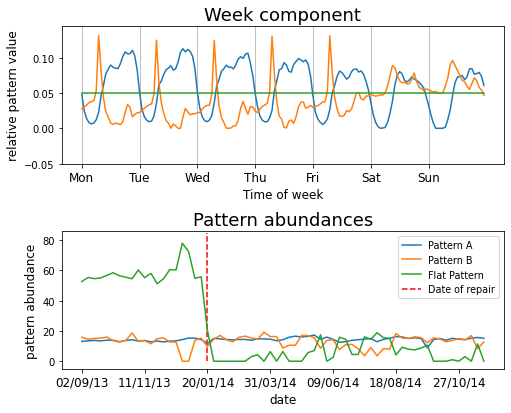

In [10]:


weekhour_array = np.full(168,'',dtype='<U3')
weekhour_array[np.arange(0,168,24)] = weekday_array
weekhour_array

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2,1, height_ratios=[1,1]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]

ax[0].plot(l_week)
ax[1].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_week)
y_max_2 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-5,y_max_2*y_lim_scaling_factor)

# Leak mark
ax[1].vlines(week_time[abundance_start:abundance_end][20],0,85,color='red',linestyle='--')

ax[0].set_xticks(np.arange(0,168,24))
ax[1].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekhour_array[::24],fontsize=small_font_size)
ax[1].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)


ax[0].set_xlabel('Time of week',fontsize=small_font_size)
ax[1].set_xlabel('date',fontsize=small_font_size)

ax[0].vlines(0,0,0.0,color='red',linestyle='--')
ax[1].legend(['Pattern A','Pattern B','Flat Pattern','Date of repair'],fontsize= small_font_size*0.8)

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Pattern abundances',fontsize=sub_title_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[1].set_ylabel('pattern abundance',fontsize=small_font_size)

ax[0].grid(axis='x')
plt.tight_layout()
plt.show()

# ----------------- Víðidalur ----------------- 

In [11]:
df = pd.read_csv('../PARAFAC implementation/Testing data/combined_sensor_data_average_ok_values.csv',index_col = 0)

df_test = df.loc[df.Name == 'K-RVK-002-RS261']
df_test.index = pd.DatetimeIndex(df_test.CTime)
df_test = df_test.sort_index()
x = df_test.loc[(df_test.Val > 0) & (df_test.Val < 12),:].Val
x = x.iloc[1100:]
x = x.resample('1h').mean()
x = x.fillna(method='ffill')
weekhour_index = x.index.weekday * 24 + x.index.hour
first_0 = np.argwhere(weekhour_index == 0)[0,0]
last_0 = np.argwhere(weekhour_index == 0)[-1,0]
x = x.iloc[first_0:last_0]
X = x.values.reshape(-1,7,24)

X_time = np.array(x.index).reshape(-1,7,24)
week_time = X_time.min(axis=(2,1))

X_vidi = X.copy()

C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# PARAFAC original

In [12]:
(core_tesnor,loadings) = non_negative_parafac(X,
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-14)
l_weeks,l_days,l_hours = loadings

<ipython-input-13-37161193cb95>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)


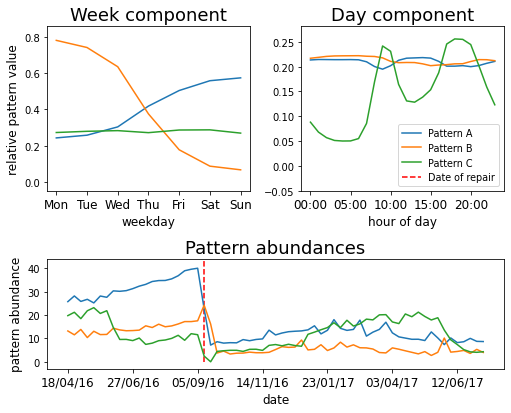

In [13]:
weekday_array = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hour_array = ['0'+str(i)+':00' for i in range(10)] + [str(i)+':00' for i in range(10,24)]

to_clean_string = lambda tmp:pd.to_datetime(str(tmp)).strftime('%d/%m/%y')

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2, 2, height_ratios=[3,2]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1]),plt.subplot(gs[2:])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]



ax[0].plot(weekday_array,l_days)
ax[1].plot(hour_array,l_hours)
ax[2].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_days)
y_max_2 = np.max(l_hours)
y_max_3 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-0.05,y_max_2*y_lim_scaling_factor)
ax[2].set_ylim(-3,y_max_3*y_lim_scaling_factor)

# Leak mark
ax[2].vlines(week_time[435:500][21],0,y_max_3*y_lim_scaling_factor,color='red',linestyle='--')

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Day component',fontsize=sub_title_font_size)
ax[2].set_title('Pattern abundances',fontsize=sub_title_font_size)

ax[1].vlines(0,0,0.0,color='red',linestyle='--')
ax[1].legend(['Pattern A','Pattern B','Pattern C','Date of repair'],fontsize= small_font_size*0.8)

ax[1].set_xticks(np.arange(0,24,5))
ax[2].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)
ax[1].set_xticklabels(hour_array[::5],fontsize=small_font_size)
ax[2].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)

ax[0].set_xlabel('weekday',fontsize=small_font_size)
ax[1].set_xlabel('hour of day',fontsize=small_font_size)
ax[2].set_xlabel('date',fontsize=small_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
# ax[1].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[2].set_ylabel('pattern abundance',fontsize=small_font_size)

# fig.suptitle('non-negative PARAFAC\nresidential neighbourhood',fontsize=title_font_Size)
plt.tight_layout()
plt.show()

# PARAFAC custom

In [14]:
flat_factors = [(1,2),(2,2)]

(core_tesnor,loadings) = non_negative_parafac_custom(X,
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-10,  
                                                     flat_factors = flat_factors)
l_weeks,l_days,l_hours = loadings



<ipython-input-15-c16861343f94>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)


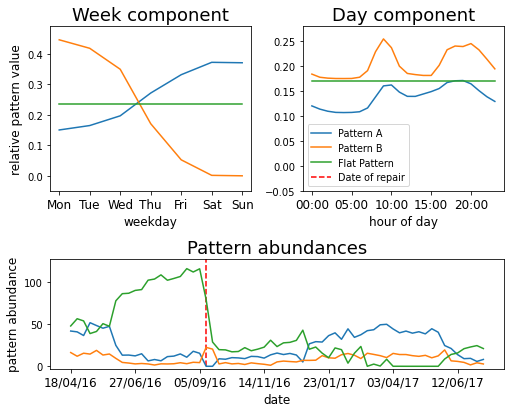

In [15]:
weekday_array = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
hour_array = ['0'+str(i)+':00' for i in range(10)] + [str(i)+':00' for i in range(10,24)]

to_clean_string = lambda tmp:pd.to_datetime(str(tmp)).strftime('%d/%m/%y')

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2, 2, height_ratios=[3,2]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1]),plt.subplot(gs[2:])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]

ax[0].plot(weekday_array,l_days)
ax[1].plot(hour_array,l_hours)
ax[2].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_days)
y_max_2 = np.max(l_hours)
y_max_3 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-0.05,y_max_2*y_lim_scaling_factor)
ax[2].set_ylim(-3,y_max_3*y_lim_scaling_factor)

# Leak mark
ax[2].vlines(week_time[435:500][21],0,y_max_3*y_lim_scaling_factor,color='red',linestyle='--')

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Day component',fontsize=sub_title_font_size)
ax[2].set_title('Pattern abundances',fontsize=sub_title_font_size)

ax[1].vlines(0,0,0.0,color='red',linestyle='--')
ax[1].legend(['Pattern A','Pattern B','Flat Pattern','Date of repair'],fontsize= small_font_size*0.8)

ax[1].set_xticks(np.arange(0,24,5))
ax[2].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekday_array,fontsize=small_font_size)
ax[1].set_xticklabels(hour_array[::5],fontsize=small_font_size)
ax[2].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)

ax[0].set_xlabel('weekday',fontsize=small_font_size)
ax[1].set_xlabel('hour of day',fontsize=small_font_size)
ax[2].set_xlabel('date',fontsize=small_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
# ax[1].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[2].set_ylabel('pattern abundance',fontsize=small_font_size)

# fig.suptitle('non-negative PARAFAC\nresidential neighbourhood',fontsize=title_font_Size)
plt.tight_layout()
plt.show()

# Unchanged "NMF"


In [16]:
flat_factors = [(1,2)]
(core_tesnor,loadings) = non_negative_parafac_custom(X.reshape(-1,7*24),
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-14,
                                                     flat_factors = flat_factors)
l_weeks,l_week = loadings

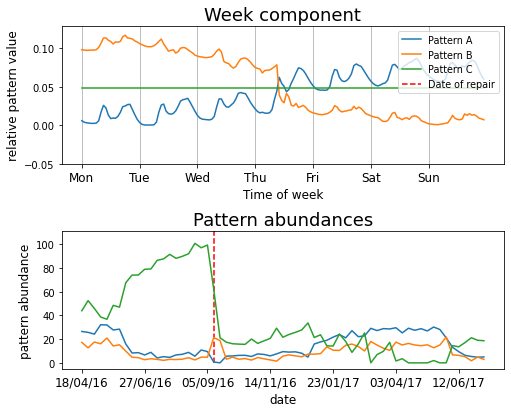

In [17]:


weekhour_array = np.full(168,'',dtype='<U3')
weekhour_array[np.arange(0,168,24)] = weekday_array
weekhour_array

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2,1, height_ratios=[1,1]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]

ax[0].plot(l_week)
ax[1].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_week)
y_max_2 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-5,y_max_2*y_lim_scaling_factor)

# Leak mark
ax[1].vlines(week_time[abundance_start:abundance_end][21],0,y_max_2*y_lim_scaling_factor,color='red',linestyle='--')

ax[0].set_xticks(np.arange(0,168,24))
ax[1].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekhour_array[::24],fontsize=small_font_size)
ax[1].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)


ax[0].set_xlabel('Time of week',fontsize=small_font_size)
ax[1].set_xlabel('date',fontsize=small_font_size)

ax[0].vlines(0,0,0.0,color='red',linestyle='--')
ax[0].legend(['Pattern A','Pattern B','Pattern C','Date of repair'],fontsize= small_font_size*0.8,loc='upper right')

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Pattern abundances',fontsize=sub_title_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[1].set_ylabel('pattern abundance',fontsize=small_font_size)

ax[0].grid(axis='x')
plt.tight_layout()
plt.show()

# "NMF" custom

In [18]:
flat_factors = [(1,2)]
(core_tesnor,loadings) = non_negative_parafac_custom(X.reshape(-1,7*24),
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-14,
                                                     flat_factors = flat_factors)
l_weeks,l_week = loadings

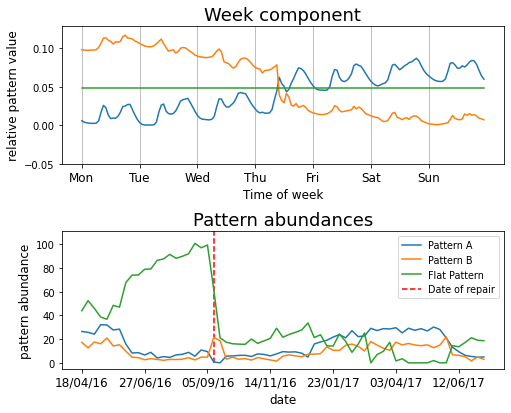

In [19]:


weekhour_array = np.full(168,'',dtype='<U3')
weekhour_array[np.arange(0,168,24)] = weekday_array
weekhour_array

small_font_size = 12
title_font_Size = 25
sub_title_font_size = 18

scale_factor = 0.9
fig = plt.figure(figsize=(8*scale_factor, 6.5*scale_factor)) 
gs = gridspec.GridSpec(2,1, height_ratios=[1,1]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1])]

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))
abundance_y = l_weeks[abundance_start:abundance_end]

ax[0].plot(l_week)
ax[1].plot(abundance_x,abundance_y)

y_max_1 = np.max(l_week)
y_max_2 = np.max(abundance_y)
y_lim_scaling_factor = 1.1

ax[0].set_ylim(-0.05,y_max_1*y_lim_scaling_factor)
ax[1].set_ylim(-5,y_max_2*y_lim_scaling_factor)

# Leak mark
ax[1].vlines(week_time[abundance_start:abundance_end][21],0,y_max_2*y_lim_scaling_factor,color='red',linestyle='--')

ax[0].set_xticks(np.arange(0,168,24))
ax[1].set_xticks(abundance_x[::10])

ax[0].set_xticklabels(weekhour_array[::24],fontsize=small_font_size)
ax[1].set_xticklabels(abundance_x_str[::10],fontsize=small_font_size)


ax[0].set_xlabel('Time of week',fontsize=small_font_size)
ax[1].set_xlabel('date',fontsize=small_font_size)

ax[0].vlines(0,0,0.0,color='red',linestyle='--')
ax[1].legend(['Pattern A','Pattern B','Flat Pattern','Date of repair'],fontsize= small_font_size*0.8)

ax[0].set_title('Week component',fontsize=sub_title_font_size)
ax[1].set_title('Pattern abundances',fontsize=sub_title_font_size)

ax[0].set_ylabel('relative pattern value',fontsize=small_font_size)
ax[1].set_ylabel('pattern abundance',fontsize=small_font_size)

ax[0].grid(axis='x')
plt.tight_layout()
plt.show()

# Abundance estimates

In [20]:
(core_tesnor,(l_weeks_NMF,_)) = non_negative_parafac_custom(X_skerja.reshape(-1,7*24),
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-14,
                                                     flat_factors = [(1,0)])

(core_tesnor,(l_weeks_PARAFAC,_,_)) = non_negative_parafac_custom(X_skerja,
                                                                  rank=3,
                                                                  n_iter_max = 5000,
                                                                  tol=1e-10,  
                                                                  flat_factors = [(1,0),(2,0)])



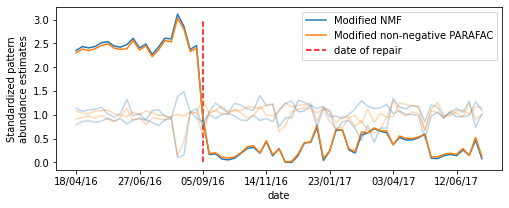

In [21]:
fig = plt.figure(figsize=(8, 6.5//2)) 

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))

abundance_y_NMF = l_weeks_NMF[abundance_start:abundance_end]
abundance_y_PARAFAC= l_weeks_PARAFAC[abundance_start:abundance_end]

abundance_y_NMF = abundance_y_NMF/np.mean(abundance_y_NMF,axis=0)
abundance_y_PARAFAC = abundance_y_PARAFAC/np.mean(abundance_y_PARAFAC,axis=0)

handle_1 = plt.plot(abundance_x,abundance_y_NMF[:,0],color='#1f77b4')
handle_2 = plt.plot(abundance_x,abundance_y_PARAFAC[:,0],color='#ff7f0e')
handle_3 = plt.vlines(week_time[abundance_start:abundance_end][20],0,3,color='red',linestyle='--')


plt.xticks(abundance_x[::10],abundance_x_str[::10])
plt.legend(['Modified NMF','Modified non-negative PARAFAC','date of repair'])


plt.plot(abundance_x,abundance_y_NMF[:,1],color='#1f77b4',alpha=0.3)
plt.plot(abundance_x,abundance_y_NMF[:,2],color='#1f77b4',alpha=0.3)

plt.plot(abundance_x,abundance_y_PARAFAC[:,1],color='#ff7f0e',alpha=0.3)
plt.plot(abundance_x,abundance_y_PARAFAC[:,2],color='#ff7f0e',alpha=0.3)

plt.xlabel('date')
plt.ylabel('Standardized pattern\nabundance estimates')
# plt.xticklabels(,fontsize=small_font_size)
# plt.xticklabels(,fontsize=small_font_size)


plt.show()

In [22]:
(core_tesnor,(l_weeks_NMF,_)) = non_negative_parafac_custom(X_vidi.reshape(-1,7*24),
                                                     rank=3,
                                                     n_iter_max = 5000,
                                                     tol=1e-14,
                                                     flat_factors = [(1,0)])

(core_tesnor,(l_weeks_PARAFAC,_,_)) = non_negative_parafac_custom(X_vidi,
                                                                  rank=3,
                                                                  n_iter_max = 5000,
                                                                  tol=1e-10,  
                                                                  flat_factors = [(1,0),(2,0)])



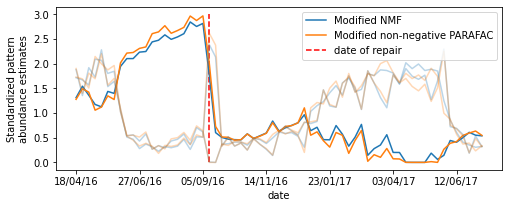

In [23]:
fig = plt.figure(figsize=(8, 6.5//2)) 

abundance_start,abundance_end = 435,500
abundance_x = week_time[abundance_start:abundance_end]
abundance_x_str = list(map(to_clean_string ,abundance_x))

abundance_y_NMF = l_weeks_NMF[abundance_start:abundance_end]
abundance_y_PARAFAC= l_weeks_PARAFAC[abundance_start:abundance_end]

abundance_y_NMF = abundance_y_NMF/np.mean(abundance_y_NMF,axis=0)
abundance_y_PARAFAC = abundance_y_PARAFAC/np.mean(abundance_y_PARAFAC,axis=0)

handle_1 = plt.plot(abundance_x,abundance_y_NMF[:,0],color='#1f77b4')
handle_2 = plt.plot(abundance_x,abundance_y_PARAFAC[:,0],color='#ff7f0e')
handle_3 = plt.vlines(week_time[abundance_start:abundance_end][21],0,3,color='red',linestyle='--')


plt.xticks(abundance_x[::10],abundance_x_str[::10])
plt.legend(['Modified NMF','Modified non-negative PARAFAC','date of repair'])


plt.plot(abundance_x,abundance_y_NMF[:,1],color='#1f77b4',alpha=0.3)
plt.plot(abundance_x,abundance_y_NMF[:,2],color='#1f77b4',alpha=0.3)

plt.plot(abundance_x,abundance_y_PARAFAC[:,1],color='#ff7f0e',alpha=0.3)
plt.plot(abundance_x,abundance_y_PARAFAC[:,2],color='#ff7f0e',alpha=0.3)

plt.xlabel('date')
plt.ylabel('Standardized pattern\nabundance estimates')
# plt.xticklabels(,fontsize=small_font_size)
# plt.xticklabels(,fontsize=small_font_size)


plt.show()